In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import csv
from scipy.stats import ttest_ind
from scipy import stats
from scipy.stats import linregress

In [88]:
light_path = '/Users/srinidhienaidu/Downloads/302_Lab_2_Data - Light Intensity- Srin.csv'
temp_var_path = '/Users/srinidhienaidu/Downloads/302_Lab_2_Data - Temporal Variation- Maeve.csv'
loc_path = '/Users/srinidhienaidu/Downloads/302_Lab_2_Data - Sheet6.csv'
df_light = pd.read_csv(light_path)
df_temp_var = pd.read_csv(temp_var_path)
df_loc = pd.read_csv(loc_path)

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def linear_regression_plots(df, path, DATA, stim_label, xlabel, effect_on, color_val):
    # Read the CSV file
    df = pd.read_csv(path)
    
    # Extract data columns
    data = df[DATA]
    stim_strength = df[stim_label]
    
    # Convert data to numpy arrays
    data = np.array([float(x) for x in data])
    stim_arr = np.array([float(x) for x in stim_strength])
    u_stim = np.array([float(x) for x in np.unique(stim_arr)])
    
    # Prepare x and y variables
    x = stim_arr
    y = data
    
    # Calculate means for unique stimulus values
    means = np.zeros(u_stim.shape[0])
    for i, val in enumerate(u_stim):
        idx = np.where(x == val)
        mean = np.mean(y[idx])
        means[i] = mean
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calculate predicted values and residuals
    y_pred = slope * x + intercept
    residuals = y - y_pred
    std_error = np.sqrt(np.sum(residuals**2) / (len(x) - 2))
    se_fit = std_error * np.sqrt(1 / len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    t_value = stats.t.ppf(1 - 0.025, len(x) - 2)  # Two-tailed for 95% CI
    
    # Calculate confidence intervals
    ci_upper = y_pred + t_value * se_fit
    ci_lower = y_pred - t_value * se_fit
    
    # Plot data
    plt.scatter(x, y, marker='o', edgecolors='k', facecolors='none', label='Data')
    plt.scatter(u_stim, means, label=f'Mean {DATA} Response', color=color_val, alpha=0.8)
    plt.plot(x, y_pred, color=color_val, alpha=0.4)
    plt.fill_between(x, ci_lower, ci_upper, color=color_val, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(xlabel)
    plt.ylabel(f'{DATA} Response (mV)')
    plt.xticks(u_stim)
    plt.title(f'Effect of {effect_on} on {DATA} Value')
    plt.legend()
    
    # Add slope and p-value to the plot in a text box
    # textstr = f'Slope: {slope:.2f}\nP-value: {p_value:.2e}\nR-squared: {(r_value**2):.2e}'
    # plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
    #                fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.figure()
    # Return p-value and R-squared
    return round(p_value, 3), round(r_value**2, 3), round(slope, 3)

# Example usage:
# p_value, r_squared = linear_regression_plots(df, 'path_to_file.csv', 'DATA_COLUMN', 'STIM_LABEL', 'X_LABEL', 'EFFECT_ON')


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def nonlinear_regression_plots(df, path, DATA, stim_label, xlabel, effect_on):
    # Read the CSV file
    df = pd.read_csv(path)
    
    # Extract data columns
    data = df[DATA]
    stim_strength = df[stim_label]
    
    # Convert data to numpy arrays
    data = np.array([float(x) for x in data])
    stim_arr = np.array([float(x) for x in stim_strength])
    u_stim = np.array([float(x) for x in np.unique(stim_arr)])
    
    # Prepare x and y variables
    x = stim_arr
    y = data
    
    # Calculate means for unique stimulus values
    means = np.zeros(u_stim.shape[0])
    for i, val in enumerate(u_stim):
        idx = np.where(x == val)
        mean = np.mean(y[idx])
        means[i] = mean
    
    # Perform a polynomial fit of degree 2 (quadratic regression)
    p = np.polyfit(x, y, 2)
    y_fit = np.polyval(p, x)
    
    # Calculate residuals and standard error
    residuals = y - y_fit
    std_error = np.sqrt(np.sum(residuals**2) / (len(x) - len(p)))
    delta = std_error * np.sqrt(1 / len(x) + (x - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    
    # Calculate R-squared
    sst = np.sum((y - np.mean(y))**2)  # Total sum of squares
    sse = np.sum((y - y_fit)**2)       # Sum of squared errors
    r_squared = 1 - (sse / sst)
    
    # Perform statistical significance test for the quadratic term
    _, p_value = stats.ttest_1samp(residuals, 0)  # Hypothesis test for non-zero residuals
    
    # Plot data and regression
    plt.scatter(x, y, marker='o', edgecolors='k', facecolors='none', label='Data')
    plt.scatter(u_stim, means, label='Mean Response', color='blue', alpha=0.8)
    plt.plot(x, y_fit, color='blue', alpha=0.4, label='Regression')
    plt.fill_between(x, y_fit + 2 * delta, y_fit - 2 * delta, color='red', alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(xlabel)
    plt.ylabel(f'{DATA} Response (mV)')
    plt.xticks(u_stim)
    plt.title(f'Effect of {effect_on} on {DATA} Value')
    plt.legend()
    
    # Add slope and p-value to the plot in a text box
    textstr = f'R-squared: {r_squared:.2f}\nP-value: {p_value:.2e}'
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    plt.figure()
    # Return p-value and R-squared
    return p_value, r_squared

# Example usage:
# p_value, r_squared = nonlinear_reg_plots(df, 'path_to_file.csv', 'DATA_COLUMN', 'STIM_LABEL', 'X_LABEL', 'EFFECT_ON')


0.0 0.548 71.374
0.0 0.784 -92.627
0.0 0.332 -71.512


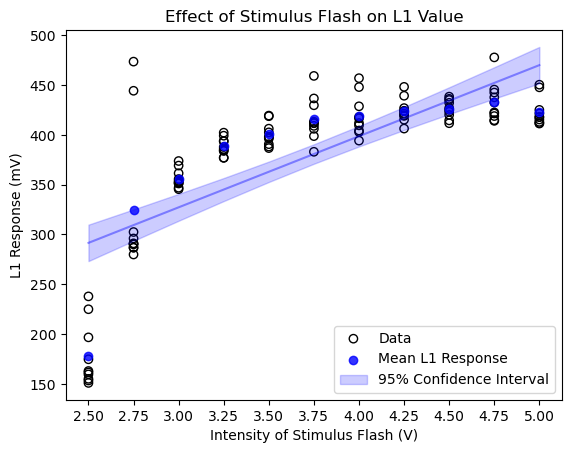

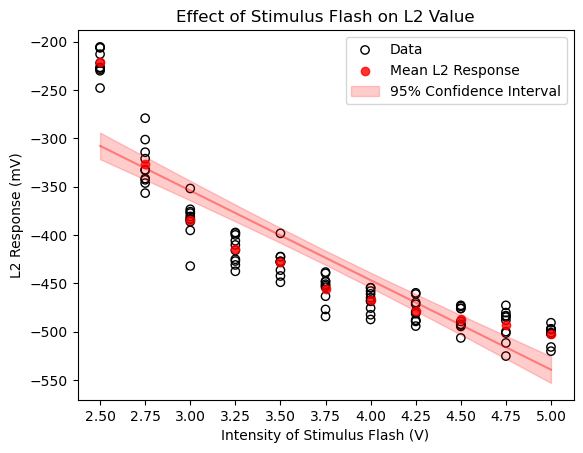

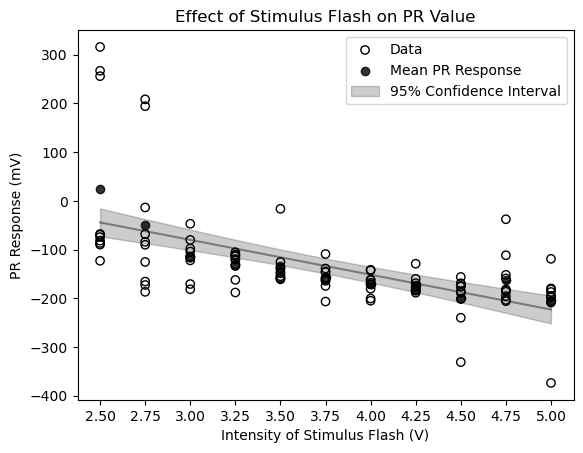

<Figure size 640x480 with 0 Axes>

In [163]:
l1_p_s, l1_r_s, l1_s_s = linear_regression_plots(df = df_light, path = light_path, DATA = 'L1', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash', color_val='b')
l2_p_s, l2_r_s, l2_s_s = linear_regression_plots(df = df_light, path = light_path, DATA = 'L2', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash', color_val='r')
PR_p_s, PR_r_s, PR_s_s = linear_regression_plots(df = df_light, path = light_path, DATA = 'PR', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash', color_val='k')
print(l1_p_s, l1_r_s, l1_s_s)
print(l2_p_s, l2_r_s, l2_s_s)
print(PR_p_s, PR_r_s, PR_s_s)

In [126]:
# nonlinear_reg_plots(df = df_light, path = light_path, DATA = 'L1', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash')
# nonlinear_reg_plots(df = df_light, path = light_path, DATA = 'L2', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash')
# nonlinear_reg_plots(df = df_light, path = light_path, DATA = 'PR', stim_label='stim_strength', xlabel = 'Intensity of Stimulus Flash (V)', effect_on = 'Stimulus Flash')

0.0 0.821 -175.098
0.002 0.153 17.197
0.222 0.026 23.722


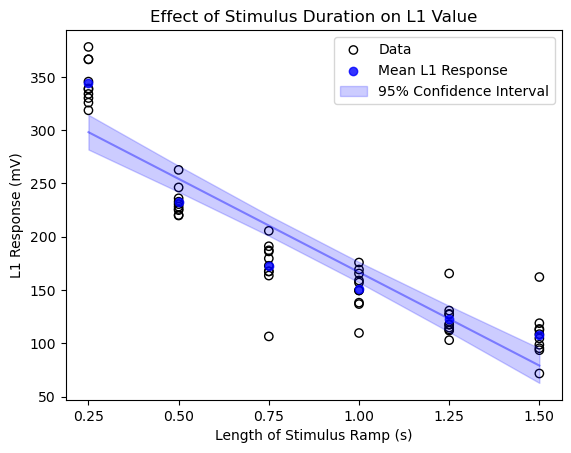

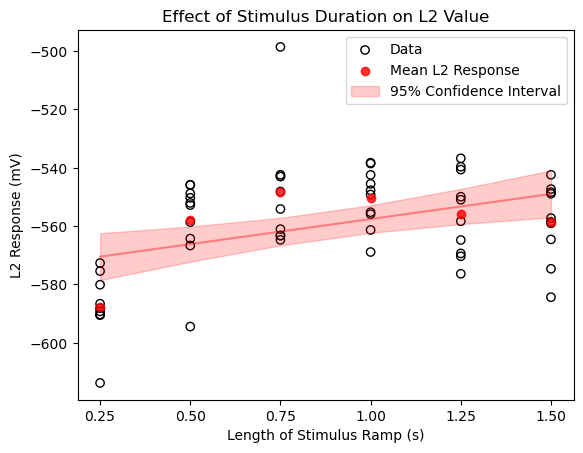

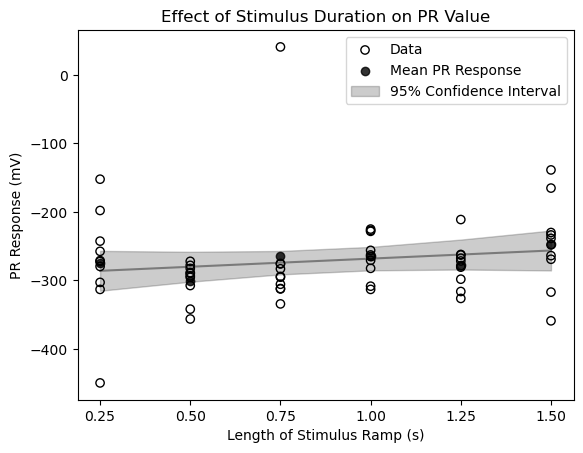

<Figure size 640x480 with 0 Axes>

In [152]:
l1_p, l1_r, l1_s = linear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'L1', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration', color_val='b')
l2_p, l2_r, l2_s = linear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'L2', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration', color_val='r')
pr_p, pr_r, pr_s = linear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'PR', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration', color_val='k')
print(l1_p, l1_r, l1_s)
print(l2_p, l2_r, l2_s)
print(pr_p, pr_r, pr_s)
# nonlinear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'L1', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration')
# nonlinear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'L2', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration')
# nonlinear_regression_plots(df = df_temp_var, path = temp_var_path, DATA = 'PR', stim_label='total_stim_time', xlabel = 'Length of Stimulus Ramp (s)', effect_on = 'Stimulus Duration')

In [3]:
loc_dict = df_loc.to_dict()

In [4]:
loc_dict.keys()

dict_keys(['angle ', 'L1', 'L2', 'PR'])

In [5]:
angles_loc = list(loc_dict['angle '].values())
L1_loc = list(loc_dict['L1'].values())
L2_loc = list(loc_dict['L2'].values())
PR_loc = list(loc_dict['PR'].values())

In [6]:
def plot_with_regression(x, y, label, color):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * np.array(x) + intercept
    return (regression_line)


L1_reg = plot_with_regression(angles_loc, L1_loc, 'L1', 'r')
L2_reg = plot_with_regression(angles_loc, L2_loc, 'L2', 'k')
PR_reg = plot_with_regression(angles_loc, PR_loc, 'PR', 'b')


In [19]:
def regression_analysis(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * np.array(x) + intercept
    return {
        # 'slope': slope,
        # 'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_err': std_err
    }

# Perform regression analysis for each set of values
stats_L1 = regression_analysis(angles_loc, L1_loc)
stats_L2 = regression_analysis(angles_loc, L2_loc)
stats_PR = regression_analysis(angles_loc, PR_loc)

# Print statistics
print("L1 Statistics:", stats_L1)
print("L2 Statistics:", stats_L2)
print("PR Statistics:", stats_PR)

L1 Statistics: {'r_squared': 0.20299203810141753, 'p_value': 0.223584402096251, 'std_err': 0.597993194631248}
L2 Statistics: {'r_squared': 0.0673168075446238, 'p_value': 0.5002026609842881, 'std_err': 0.5374008730594461}
PR Statistics: {'r_squared': 0.0009354915377882947, 'p_value': 0.9377396614540683, 'std_err': 0.24824388736186825}


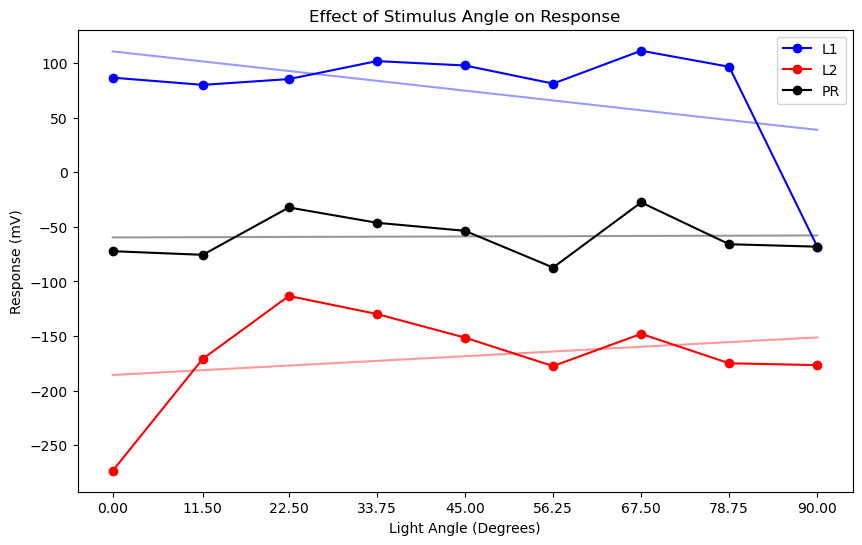

In [161]:
table_data = [
    # ['Slope', f"{stats_L1['slope']:.2f}", f"{stats_L2['slope']:.2f}", f"{stats_PR['slope']:.2f}"],
    # ['Intercept', f"{stats_L1['intercept']:.2f}", f"{stats_L2['intercept']:.2f}", f"{stats_PR['intercept']:.2f}"],
    ['R-squared', f"{stats_L1['r_squared']:.2f}", f"{stats_L2['r_squared']:.2f}", f"{stats_PR['r_squared']:.2f}"],
    ['P-value', f"{stats_L1['p_value']:.2e}", f"{stats_L2['p_value']:.2e}", f"{stats_PR['p_value']:.2e}"],
    ['Std error', f"{stats_L1['std_err']:.2f}", f"{stats_L2['std_err']:.2f}", f"{stats_PR['std_err']:.2f}"]
]

# Colors for each line
# colors = ['blue', 'red', 'green']

fig = plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(angles_loc, L1_loc, color='b', marker='o', label=f'L1')
plt.plot(angles_loc, L1_reg, color='b', alpha=0.4)
plt.plot(angles_loc, L2_loc, color='r', marker='o', label=f'L2')
plt.plot(angles_loc, L2_reg, color='r', alpha=0.4)
plt.plot(angles_loc, PR_loc, color='k', marker='o', label=f'PR')
plt.plot(angles_loc, PR_reg, color='k', alpha=0.4)

plt.legend()
plt.xlabel('Light Angle (Degrees)')
plt.ylabel('Response (mV)')
plt.title('Effect of Stimulus Angle on Response')
plt.xticks(np.array(angles_loc))

# Create the table with transparent colors
# table = plt.table(
#     cellText=table_data,
#     colLabels=['-', 'L1', 'L2', 'PR'],
#     colColours=['white', (0, 0, 1, 0.5), (1, 0, 0, 0.5),  (0, 0, 0, 0.5)],
#     cellLoc='center',
#     colLoc='center',
#     loc='right'
# )

# Use fig.add_axes to manually position the table at a specific location
# The location is [left, bottom, width, height] in normalized coordinates
# You can adjust the bottom value to move the table further away from the plot
# table_axes = fig.add_axes([0.1, -0.3, 0.8, 0.15])  # Adjust bottom for spacing
# table.set_bbox(table_axes.get_position())

# Show the plot
plt.show()
